In [1]:
import numpy as np
import matplotlib.pyplot as plt
import winsound
import time

In [2]:
def Mdot(M, t):
    #input_masses = np.array([0.15,0.15,0.065,0.1,0.17,0.17,0.11,0.035,0.05,0.05,0.024,0.1,0.2,0.12,0.1,0.15])
    #input_Mdots = np.array([1.2E-8,2.0E-9,9.0E-10,5.0E-10,4.4e-10,1.5e-10,5.3e-11,1.9e-11,9.2e-12,6.9e-12,2.3e-12,2.2e-11,5.8e-11,1.4e-11,6.2e-12,1.3e-10])
    
    #input_logtimes = np.array([6.,6.4,6.5,6.9,6.1,6.3,7.1,7.,6.6,6.5,7.,6.,6.1,6.,6.5,6.])
    
    #scaling_factor = np.array([(M/x) for x in input_masses])
    
    #fitting_Mdots = np.array([np.log10(input_Mdots[i] * ((scaling_factor[i])**(4.1))) for i in range(input_Mdots.size)])
    
    #x2 = input_logtimes**2
    #xy = input_logtimes*fitting_Mdots
    #y2 = fitting_Mdots**2
    
    #xbar = np.sum(input_logtimes)/16.
    #ybar = np.sum(fitting_Mdots)/16.
    
    #x2bar = np.sum(x2)/16.
    #xybar = np.sum(xy)/16.
    #y2bar = np.sum(y2)/16.
    
    #r = (xybar - (xbar*ybar))/(((x2bar - (xbar**2))*(y2bar - (ybar**2)))**0.5)
    
    #beta = r*np.std(fitting_Mdots)/np.std(input_logtimes)
    
    #alpha = ybar - (beta*xbar)
    
    if t <= 0.:
        return 0.0
    
    Mdot_unscaled = (10.**(-1.32)) * (t**(-1.07))
    
    #print 'logMdot_unscaled', logMdot_unscaled
    #print alpha, beta
    
    #Mdot_unscaled = 10.**(logMdot_unscaled)
    
    #print 'Mdot_unscaled', Mdot_unscaled
    
    Mdotres = Mdot_unscaled * ((M/0.7)**2.1)
    
    #print 'Mdot', Mdotres
    
    return Mdotres

def rk4(M_in, t_in, h):
    t_out = t_in + h
    
    k1 = h * Mdot(M_in, t_in)
    k2 = h * Mdot((M_in + (k1/2.)),(t_in+(h/2.)))
    k3 = h * Mdot((M_in + (k2/2.)),(t_in+(h/2.)))
    k4 = h * Mdot((M_in + k3),(t_in + h))
    
    #print k1, k2, k3, k4
    
    M_out = M_in + ((1./6.)*(k1 + (2.*k2) + (2.*k3) + k4))
    
    return M_out, t_out
    

0.0 0.14222 0.0
1000000.0 0.157313498099 7.91594360446e-10 -9.1014973085 7.35999822617e-06 0.540466658274
2000000.0 0.157851012509 3.79761996319e-10 -9.4204884983 7.4849998951e-06 0.536424992482
3000000.0 0.158155258196 2.47087063454e-10 -9.60714999202 7.05333312352e-06 0.493733318647
4000000.0 0.158366669251 1.82130998734e-10 -9.7396161309 6.81249976158e-06 0.465520817041
5000000.0 0.158528144322 1.4375388842e-10 -9.84238039918 6.6859998703e-06 0.445733324687
6000000.0 0.15865847119 1.18480024392e-10 -9.92635486508 6.50499979655e-06 0.422933312257
7000000.0 0.158767543417 1.0060946412e-10 -9.99736116419 6.32857118334e-06 0.400809508278
8000000.0 0.158861204904 8.73223308298e-11 -10.0588746805 6.36999994516e-06 0.392816663285
9000000.0 0.158943191758 7.70659761331e-11 -10.1131373164 6.28111097548e-06 0.376866658529
10000000.0 0.159016035374 6.8915998162e-11 -10.1616799493 6.21099996567e-06 0.362308331331
11000000.0 0.159081529021 6.228814992e-11 -10.2055945683 6.17363626307e-06 0.34983

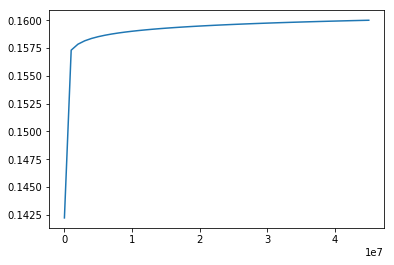

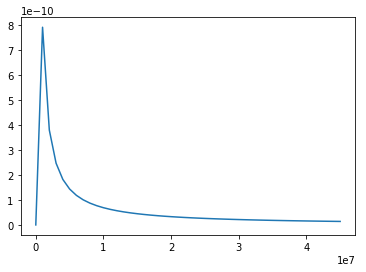

In [17]:
M0 = 0.14222
t0 = 0.

Mvec = [M0]
tvec = [t0]
Mdotvec = [Mdot(M0, t0)]

Mplotvec = [M0]
tplotvec = [t0]
Mdotplotvec = [Mdot(M0, t0)]

print t0, M0, Mdotvec[0]

tstart = time.time()

while tvec[-1] < 45000000.:
    Mret, tret = rk4(Mvec[-1],tvec[-1],10.)
    Mvec.append(Mret)
    Mdotvec.append(Mdot(Mret, tret))
    #if (((len(tvec)-1)%1000000) < 1) or ((len(tvec) - 1) < 1000000.):
    if ((tret%1000000) < 1):
        print tret, Mret, Mdotvec[-1], np.log10(Mdotvec[-1]), (time.time() - tstart)/float(len(tvec)), ((4500000.-float(len(tvec)))*(time.time() - tstart)/float(len(tvec)))/60.
        tplotvec.append(tret)
        Mplotvec.append(Mret)
        Mdotplotvec.append(Mdot(Mret, tret))
    tvec.append(tret)

print 'Mass accreted', (Mvec[-1] - M0), 'solar masses'
print (Mvec[-1] - M0)/Mvec[-1]
    
plt.figure()
plt.plot(tplotvec, Mplotvec)
plt.show()

plt.figure()
plt.plot(tplotvec, Mdotplotvec)
plt.show()